In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr

In [2]:
sys.path.append('..')

In [3]:
not_path = '../Data/analyzed/not_year_evo.csv'
res_path = '../Data/analyzed/res_year_evo.csv'
mun_path = '../Data/age_groups_municipalities.csv'
mun_2_path = '../Data/municipalities.csv'

df_not = pd.read_csv(not_path)
df_res = pd.read_csv(res_path)
mun_file = pd.read_csv(mun_path)
mun_2_file = pd.read_csv(mun_2_path)

In [4]:
age_names = ['0 a 4',
 '5 a 9',
 '10 a 14',
 '15 a 19',
 '20 a 29',
 '30 a 39',
 '40 a 49',
 '50 a 59',
 '60 a 69',
 '70 a 79',
 '80+']

In [5]:
df_res = df_res[['Unnamed: 0','ID_MN_RESI','(0, 4]', '(4, 9]', '(9, 14]', '(14, 19]', '(19, 29]',
       '(29, 39]', '(39, 49]', '(49, 59]', '(59, 69]', '(69, 79]','(79, 120]','TOTAL']]

df_not = df_not[['Unnamed: 0','ID_MUNICIP','(0, 4]', '(4, 9]', '(9, 14]', '(14, 19]', '(19, 29]',
       '(29, 39]', '(39, 49]', '(49, 59]', '(59, 69]', '(69, 79]','(79, 120]','TOTAL']]

In [6]:
mun_2_file['municipio'] = mun_2_file['municipio'].astype(str).str[:6].astype(int)

In [7]:
mun_file = mun_file.drop(columns = ['Unnamed: 0','Total'])
mun_file = mun_file.set_index('Municipio')

## Focusing on municipality of residence

In [8]:
df_res_year = df_res.groupby(['ID_MN_RESI'])['TOTAL'].sum()
df_res_year = df_res_year.reset_index()

In [9]:
df_res_year = df_res_year.merge(mun_2_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'municipio')

In [10]:
df_res_year['CASES_100'] = (df_res_year['TOTAL']/df_res_year['pop_21'])*(10**5)

In [11]:
df_res_year = df_res_year.sort_values(by = ['CASES_100'], ascending = False)
df_res_year = df_res_year[['ID_MN_RESI','name','uf_code','TOTAL','CASES_100']]

In [12]:
list_mun = df_res_year[:20]['ID_MN_RESI']

In [13]:
list_mun = list(list_mun)

In [14]:
df_res = df_res.drop(columns = ['Unnamed: 0','TOTAL'])
df_res = df_res.set_index('ID_MN_RESI')

In [15]:
df_res.columns = mun_file.columns

In [16]:
df_res = (df_res/mun_file)*(10**5)

In [17]:
df_res = df_res.dropna()

In [18]:
df_res = df_res.reset_index()

In [19]:
df_res = df_res[df_res['index'].isin(list_mun)]
df_res = df_res.reset_index()

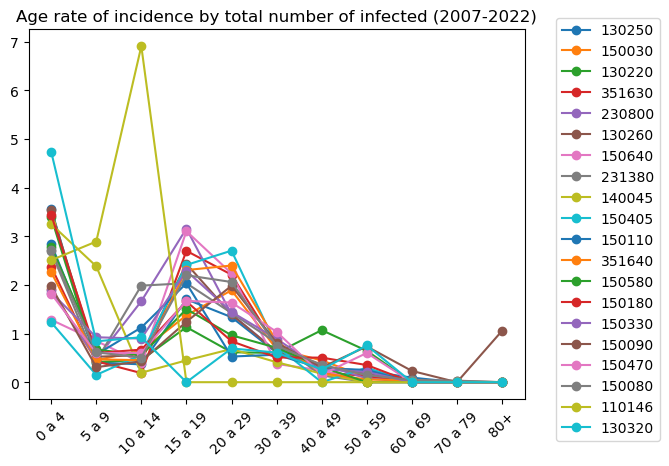

In [20]:
for mun in list_mun:
    df_tmp = df_res[df_res['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_res_year[df_res_year['ID_MN_RESI'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('Age rate of incidence by total number of infected (2007-2022)')
plt.show()

## Focusing on municipality of notification

In [21]:
df_not_year = df_not.groupby(['ID_MUNICIP'])['TOTAL'].sum()
df_not_year = df_not_year.reset_index()

df_not_year = df_not_year.merge(mun_2_file, how = 'left', left_on = 'ID_MUNICIP', right_on = 'municipio')

df_not_year['CASES_100'] = (df_not_year['TOTAL']/df_not_year['pop_21'])*(10**5)

df_not_year = df_not_year.sort_values(by = ['CASES_100'], ascending = False)
df_not_year = df_not_year[['ID_MUNICIP','name','uf_code','TOTAL','CASES_100']]

list_mun = df_not_year[:20]['ID_MUNICIP']

list_mun = list(list_mun)

df_not = df_not.drop(columns = ['Unnamed: 0','TOTAL'])
df_not = df_not.set_index('ID_MUNICIP')

df_not.columns = mun_file.columns

df_not = (df_not/mun_file)*(10**5)

df_not = df_not.dropna()

df_not = df_not.reset_index()

df_not = df_not[df_not['index'].isin(list_mun)]
df_not = df_not.reset_index()

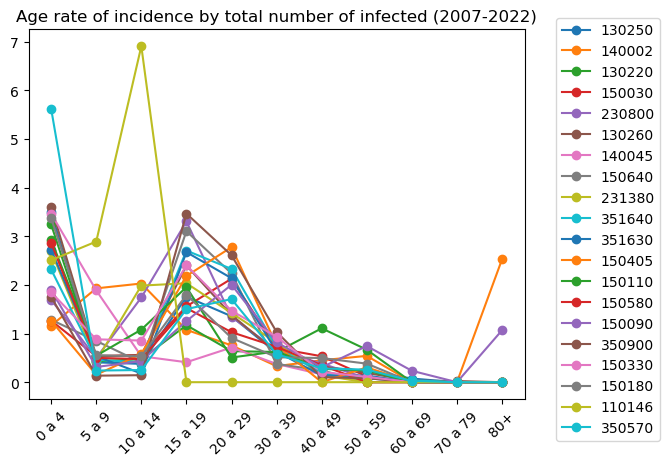

In [22]:
for mun in list_mun:
    df_tmp = df_not[df_not['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_not_year[df_not_year['ID_MUNICIP'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('Age rate of incidence by total number of infected (2007-2022)')
plt.show()

## Manacapuru

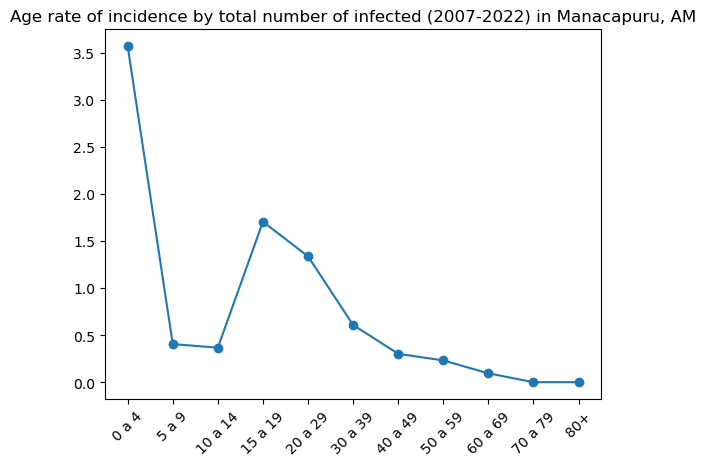

In [23]:
for mun in [130250]:
    df_tmp = df_res[df_res['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_res_year[df_res_year['ID_MN_RESI'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
#plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('Age rate of incidence by total number of infected (2007-2022) in Manacapuru, AM')
plt.show()

## Manaus

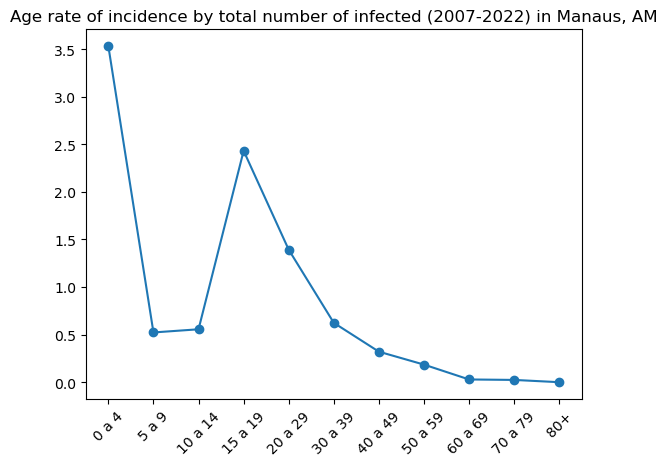

In [24]:
for mun in [130260]:
    df_tmp = df_res[df_res['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_res_year[df_res_year['ID_MN_RESI'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
plt.title('Age rate of incidence by total number of infected (2007-2022) in Manaus, AM')
plt.show()

## Francisco Morato

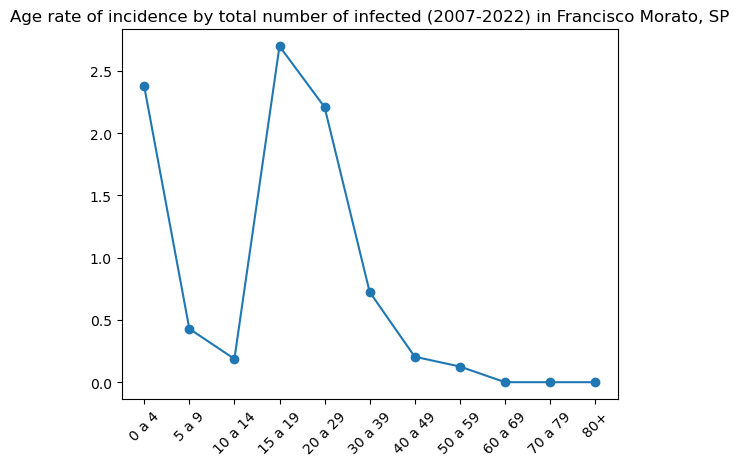

In [25]:
for mun in [351630]:
    df_tmp = df_res[df_res['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_res_year[df_res_year['ID_MN_RESI'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
plt.title('Age rate of incidence by total number of infected (2007-2022) in Francisco Morato, SP')
plt.show()

## Pacaraima

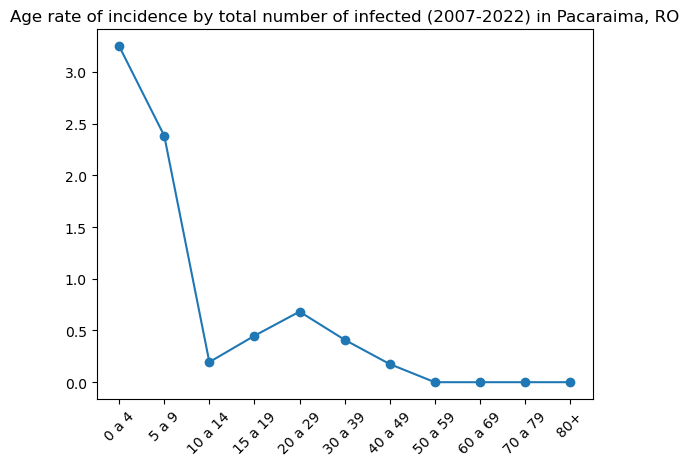

In [26]:
for mun in [140045]:
    df_tmp = df_res[df_res['index'] == mun]
    np_tmp = df_tmp.to_numpy()
    np_tmp = np_tmp[0][2:]
    n_tmp = df_res_year[df_res_year['ID_MN_RESI'] == mun].to_numpy()
    n_tmp = n_tmp[0][-1]
    np_tmp = np_tmp/n_tmp
    plt.plot(np_tmp, '-o',label = int(mun))

x_ticks = np.arange(0,len(age_names),1)
plt.xticks(x_ticks, age_names, rotation = 45,fontsize = 10)
plt.title('Age rate of incidence by total number of infected (2007-2022) in Pacaraima, RO')
plt.show()